In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pickle
import os
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from tensorflow import keras

In [2]:
!python /content/final.py
#running our custom final .py file

2021-03-19 12:01:09.398910: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [3]:
import final
#""" importing our custom final .py file"""

In [4]:
# Creating class object and loading all the saved models
final_obj= final.final('/content/drive/MyDrive/Self Case Study/minmax_scaler.pkl', '/content/drive/MyDrive/Self Case Study/label_encoder.pkl', '/content/drive/MyDrive/Self Case Study/cnn_model')

In [5]:
#testing predict
df= pd.read_csv('/content/drive/MyDrive/Self Case Study/data.csv')
df.head(1)

,Unnamed: 0,path,emotions,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,0,/content/TESS Toronto emotional speech set dat...,angry,0.30633,0.027156,0.018023,0.006379,0.009205,0.058144,0.149881,0.812229,1.819697,0.697084,0.284318,0.370404,1.201798,2.118439,0.710244,2.26702,11.65243,9.945084,3.938485,2.263899,0.358536,0.137015,0.07879,0.103248,0.638341,1.407552,1.720063,1.090128,0.864072,0.555931,0.255999,0.083801,0.072725,0.161313,1.278271,1.667713,0.306394,...,0.001217,0.000901,0.00125,0.00206,0.002163,0.003757,0.002836,0.003426,0.004881,0.006578,0.008321,0.007439,0.005527,0.006339,0.008361,0.010836,0.01174,0.016675,0.017556,0.028561,0.024322,0.012027,0.017793,0.01553,0.014297,0.004712,0.000387,-343.2179,32.592148,-3.941084,24.603947,-18.831808,-6.736715,0.991936,-15.011475,-8.271952,-3.882542,-16.573217,13.243216,-13.899858


In [6]:
# testing with 2 query points, this can be any data with any number of rows but 141 columns
xq= df.iloc[0:2, 3:]
print(type(xq))
print(xq.shape)

<class 'pandas.core.frame.DataFrame'>
(2, 141)


In [7]:
#final_prediction that reuturns an array of emotional words corrosponding to 141 numerical Mel features
final_obj.predict(xq)

array(['angry', 'angry'], dtype=object)

In [8]:
# predicting and getting prediction vs original table heads by passing our dataset. We can pass json or csv format
final_obj.train_test_results('/content/drive/MyDrive/Self Case Study/data.csv')

  prediction
0  surprised
1       calm
2    disgust
3    disgust
4      happy 
 
       actual
0  surprised
1       calm
2    disgust
3       calm
4      happy


In [9]:
# saving class results in variables to use them in function 2 for train- test evaluation
y_train = final_obj.y_train
y_test = final_obj.y_test
y_pred_tr = final_obj.y_pred_tr
y_pred_te = final_obj.y_pred_te
prediction = final_obj.prediction
actual = final_obj.actual
class_label= final_obj.class_label

In [10]:
def function_2(y_train, y_test, y_pred_tr, y_pred_te, prediction, actual, class_label):
    """this function prints the actual_vs_predict df, confuion_matrix and the final classification report"""
    
    true_vs_pred = pd.concat([actual, prediction], axis=1)

    classes = list(class_label.unique())
    
    cm  = confusion_matrix(actual, prediction, labels= classes)
    cm = pd.DataFrame(cm , index = classes , columns = classes)

    plt.figure(figsize = (10, 8))
    sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion matrix for cnn')
    plt.show()
    
    print(classification_report(actual, prediction, target_names = classes))

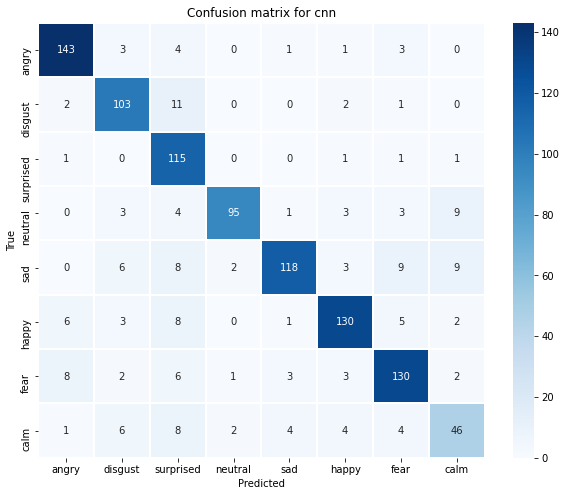

              precision    recall  f1-score   support

       angry       0.89      0.92      0.91       155
     disgust       0.67      0.61      0.64        75
   surprised       0.82      0.87      0.84       119
     neutral       0.83      0.84      0.84       155
         sad       0.88      0.84      0.86       155
       happy       0.95      0.81      0.87       118
        fear       0.92      0.76      0.83       155
        calm       0.70      0.97      0.81       119

    accuracy                           0.84      1051
   macro avg       0.83      0.83      0.82      1051
weighted avg       0.85      0.84      0.84      1051



In [11]:
function_2(y_train, y_test, y_pred_tr, y_pred_te, prediction, actual, class_label)